### subplot()

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [3]:
year=["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
online_sale=[5,8,8,9,10,12,8,7,20,22]

#### multiple plot for comparison

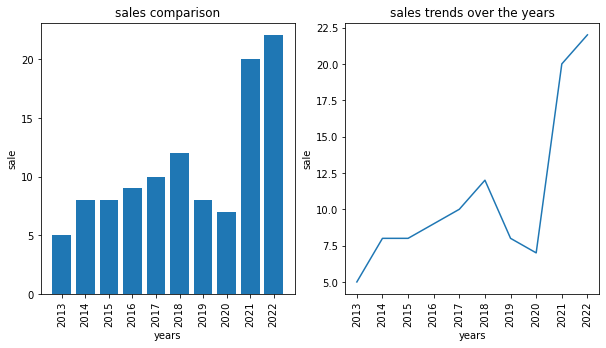

In [4]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1) #(1st row, 2 plots, 1st index)
plt.bar(year,online_sale)
plt.xlabel("years")
plt.ylabel("sale")
plt.title("sales comparison")
plt.xticks(rotation=90)

plt.subplot(1,2,2) #(1st row, 2 plots, 2nd index)
plt.plot(year,online_sale)
plt.xlabel("years")
plt.ylabel("sale")
plt.title("sales trends over the years")
plt.xticks(rotation=90)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_27272\3596671426.py:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(a,1/np.sin(a))


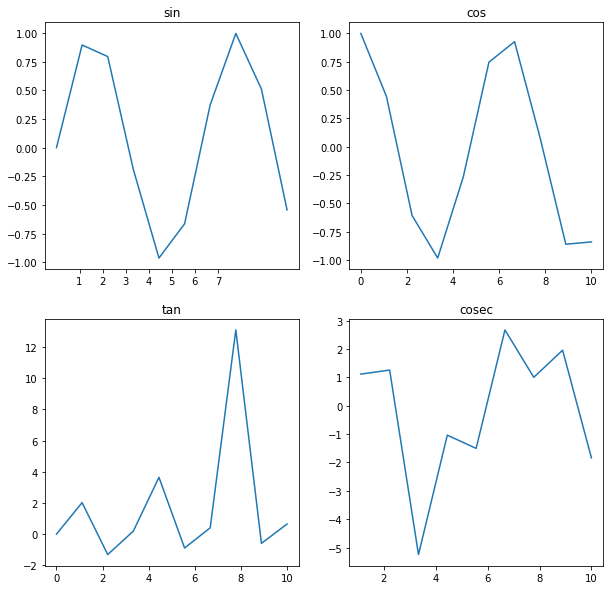

In [5]:
a=np.linspace(0,10,10)
plt.figure(figsize=(10,10))

plt.subplot(2,2,1) #2 rows, 2 cols and 1st position
plt.plot(a,np.sin(a))
plt.title("sin")
plt.xticks([1,2,3,4,5,6,7]) #to change/highlight the ticks (by default inter takes best)

plt.subplot(2,2,2)
plt.plot(a,np.cos(a))
plt.title("cos")

plt.subplot(2,2,3)
plt.plot(a,np.tan(a))
plt.title("tan")

plt.subplot(2,2,4)
plt.plot(a,1/np.sin(a))
plt.title("cosec")
plt.show()

- boxplot()
    - to detect the outliers in the data
    - 5 number summary(like describe in numeric analysis)
    - univariate analysis (boxplot of seaborn is used for bivariate and multivariate analysis)
    - only works for numeric data (like describe)

In [6]:
import seaborn as sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


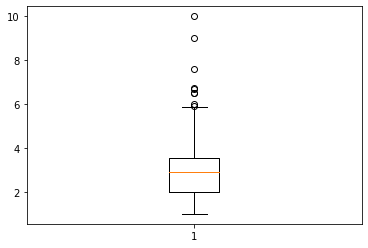

In [7]:
plt.boxplot(df["tip"]); #circles are outliers

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


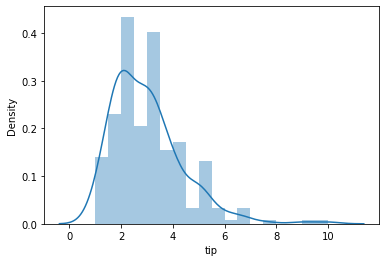

In [8]:
#graphically
sns.distplot(df["tip"]); #kde:kernel density---pdf:probablity density func---a prediction area
#there are chances people coming will tend to give the tip from 0 to 4

In [9]:
#mathematically
df["tip"].skew() #if skewness>0 : right skewed, skew<0 : left skewed

1.4654510370979401

### finding limits

In [10]:
df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [14]:
p25=df["tip"].quantile(0.25)
p75=df["tip"].quantile(0.75)
print(p75,p25)
IQR=p75-p25
print(IQR)

3.5625 2.0
1.5625


In [16]:
upper_limit=p75 + 1.5*IQR
lower_limit=p25 - 1.5*IQR
print(upper_limit) #beyond 5.9 are right outliers
print(lower_limit) #beyond -0.3 are left/lower outliers

5.90625
-0.34375


In [17]:
print(df[df["tip"]>upper_limit]) #all upper ouliers
len(df[df["tip"]>upper_limit])

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


9

In [18]:
print(df[df["tip"]<lower_limit]) #no left outliers

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []


### Removing/handling outliers for ML models:
- trimming: not recommended as info is lost
- capping: data balance with upper limit or lower limit (filling)

### Trimming

In [20]:
dff=df[(df["tip"]<upper_limit) & (df["tip"]>lower_limit)]
dff

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
dff['tip'].skew()

0.5745852200074195

### capping: conditions along with updation using np.where()

In [22]:
new_df_cap = df.copy()  ## create a copy for handling outlier in tips
new_df_cap

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
new_df_cap['tip'] = np.where(new_df_cap['tip'] > upper_limit, upper_limit, 
                                              np.where(new_df_cap['tip'] < lower_limit, lower_limit,
                                                       new_df_cap['tip'])) 
# for middle part of box which can be replaced with any one 

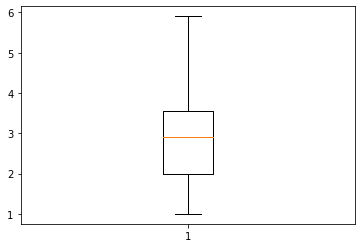

In [25]:
plt.boxplot(new_df_cap['tip']);